# Weather analysis
The weather data used in this analysis was pulled from the World Bank Group's Climate Change Knowledge Portal on Feb 6, 2021. https://climateknowledgeportal.worldbank.org/download-data

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Import weather data and convert to a DataFrame for analysis

In [101]:
rains_df = pd.read_csv("Resources/world_rains.csv")
temps_df = pd.read_csv("Resources/world_temps.csv")
rains_df = rains_df.rename(columns={"Rainfall - (MM)": "Rainfall (mm)", " Year": "Year", " Statistics": "Statistics", 
                                    " Country": "Country", " ISO3": "ISO3"}) 
temps_df = temps_df.rename(columns={"Temperature - (Celsius)": "Temperature (C)", " Year": "Year", " Statistics": "Statistics", 
                                    " Country": "Country", " ISO3": "ISO3"}) 

#The weather dataset has data from 1991 - 2016.  Remove years that aren't 2015 or 2016
rains_df_2015 = rains_df.loc[(rains_df["Year"] == 2015), :]
rains_df_2016 = rains_df.loc[(rains_df["Year"] == 2016), :]
temps_df_2015 = temps_df.loc[(temps_df["Year"] == 2015), :]
temps_df_2016 = temps_df.loc[(temps_df["Year"] == 2016), :]

# We just want one value for rainfall and temp per year per country. 
# Find mean rainfall and temperature by country by year, then
# Make one dataframe for 2015 and one for 2016 to match the happiness dataframes for merging later.
# The csvs have leading spaces in front of the country names, so also need to strip that whitespace  
# for the merge to work later.

r_2015_g = rains_df_2015.groupby("Country")
r_2016_g = rains_df_2016.groupby("Country")

t_2015_g = temps_df_2015.groupby("Country")
t_2016_g = temps_df_2016.groupby("Country")

simple_2015 = r_2015_g.mean()
simple_2016 = r_2016_g.mean()

t_simple_2015 = t_2015_g.mean()
t_simple_2016 = t_2016_g.mean()

simple_2015["Temp"] = t_simple_2015["Temperature (C)"]
del simple_2015["Year"]
simple_2015_wx = simple_2015.reset_index()
simple_2015_wx["Country"] = simple_2015_wx["Country"].str.strip()

simple_2016["Temp"] = t_simple_2016["Temperature (C)"]
del simple_2016["Year"]
simple_2016_wx = simple_2016.reset_index()
simple_2016_wx["Country"] = simple_2016_wx["Country"].str.strip()

simple_2015_wx.head()

,Country,Rainfall (mm),Temp
0,Afghanistan,33.449854,13.866922
1,Albania,78.137235,12.685259
2,Algeria,6.511808,23.656875
3,Andorra,50.934788,12.573667
4,Angola,75.087551,22.260433


### Import World Happiness Data and merge with Weather Data

In [107]:
# 2015 World Happiness Data import to dataframe and format
h_2015_df = pd.read_csv("Resources/2015.csv")
h_2015_df.head()
del h_2015_df["Standard Error"]
del h_2015_df["Dystopia Residual"]
#h_2015_df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [108]:
# 2016 World Happiness Data import to dataframe and format
h_2016_df = pd.read_csv("Resources/2016.csv")
h_2016_df.head()
del h_2016_df["Lower Confidence Interval"]
del h_2016_df["Upper Confidence Interval"]
del h_2016_df["Dystopia Residual"]
#h_2016_df.head()

In [106]:
#The Merge
both_df_2015 = pd.merge(h_2015_df,simple_2015_wx,how="inner",on="Country")
both_df_2015.head()

both_df_2016 = pd.merge(h_2016_df,simple_2016_wx,how="inner",on="Country")
both_df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Rainfall (mm),Temp
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,56.890975,9.056102
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,137.437713,7.135720
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,101.170875,3.206224
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,86.112425,2.264043
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,52.059850,3.104377


### Visualizations - are weather and happiness correlated?

y = -2.6x + 32.66


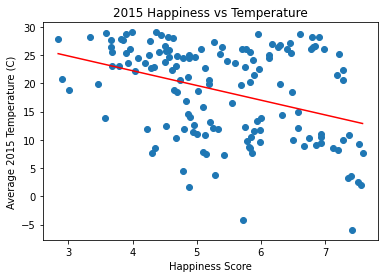

In [112]:
x_values = both_df_2015['Happiness Score']
y_values = both_df_2015['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('2015 Happiness vs Temperature')
plt.xlabel('Happiness Score')
plt.ylabel('Average 2015 Temperature (C)')
plt.show()

No strong linear trend for this comparison, but as a southerner, I find it surprising that countries with annual average temperatures at or below freezing tend to have higher than average happiness scores.

Text(0.5, 1.0, '2016 Happiness v Rainfall')

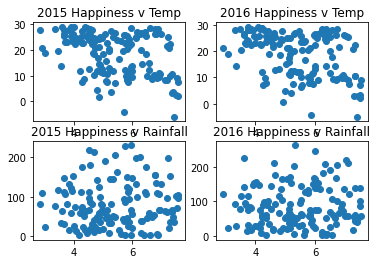

In [117]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(x_values, y_values)
axs[0, 0].set_title("2015 Happiness v Temp")

axs[0, 1].scatter(both_df_2016['Happiness Score'], both_df_2016['Temp'])
axs[0, 1].set_title("2016 Happiness v Temp")

axs[1, 0].scatter(both_df_2015['Happiness Score'], both_df_2015['Rainfall (mm)'])
axs[1, 0].set_title("2015 Happiness v Rainfall")

axs[1, 1].scatter(both_df_2016['Happiness Score'], both_df_2016['Rainfall (mm)'])
axs[1, 1].set_title("2016 Happiness v Rainfall")